In [13]:
# loading datesets
import pandas as pd
# student_score = pd.read_csv("C:\\Users\\HP\\student-scores-6000.csv")
student_score = pd.read_csv("C:\\Users\\HP\\student-scores-studies.csv")
student_score

,id,first_name,last_name,email,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score
0,1,Paul,Casey,paul.casey.1@gslingacademy.com,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87
1,2,Danielle,Sandoval,danielle.sandoval.2@gslingacademy.com,female,False,2,False,47,Doctor,90,86,96,100,90,88,90
2,3,Tina,Andrews,tina.andrews.3@gslingacademy.com,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94
3,4,Tara,Clark,tara.clark.4@gslingacademy.com,female,False,5,False,3,Artist,71,74,88,80,89,63,86
4,5,Anthony,Campos,anthony.campos.5@gslingacademy.com,male,False,5,False,10,Social Network Studies,84,77,65,65,80,74,76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,Alan,Reynolds,alan.reynolds.1996@gslingacademy.com,male,False,2,False,30,Construction Engineer,83,77,84,73,75,84,82
5996,5997,Thomas,Gilbert,thomas.gilbert.1997@gslingacademy.com,male,False,2,False,20,Software Engineer,89,65,73,80,87,67,73
5997,5998,Madison,Cross,madison.cross.1998@gslingacademy.com,female,False,5,False,14,Software Engineer,97,85,63,93,68,94,78
5998,5999,Brittany,Compton,brittany.compton.1999@gslingacademy.com,female,True,10,True,5,Business Owner,51,96,72,89,95,88,75


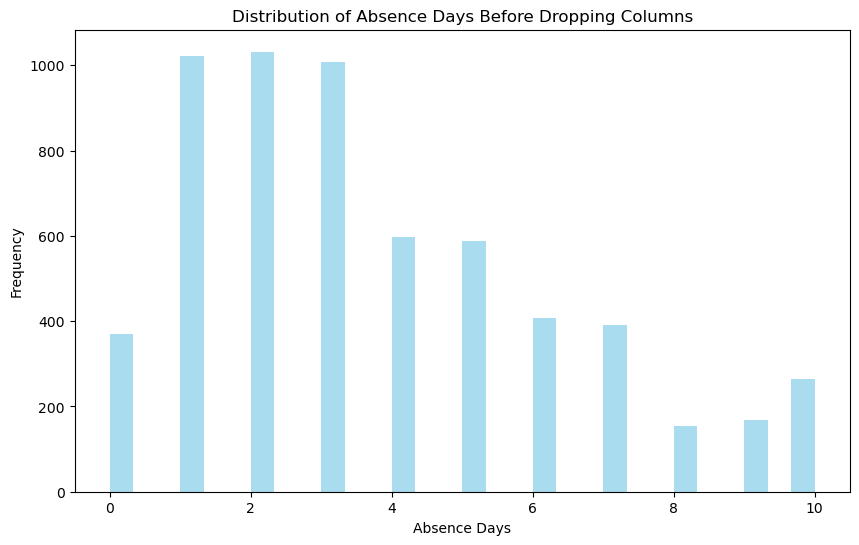

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
# Initial data visualization (for example, plotting the number of absence days)
plt.figure(figsize=(10, 6))
plt.hist(student_score['absence_days'], bins=30, color='skyblue', alpha=0.7)
plt.title('Distribution of Absence Days Before Dropping Columns')
plt.xlabel('Absence Days')
plt.ylabel('Frequency')
plt.show()

# drop irrelevant columns

In [15]:
student_score.columns
student_score.drop(columns=['id','first_name','last_name','email'],axis=1, inplace=True)

# create new features from all score

In [16]:
student_score["total_score"] = student_score["math_score"] + student_score["history_score"] + student_score["physics_score"] + student_score["chemistry_score"] + student_score["biology_score"] + student_score["english_score"] + student_score["geography_score"]
student_score["average_score"] = student_score["total_score"] / 7
student_score.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,male,False,3,False,27,Lawyer,73,81,93,97,63,80,87,574,82.000000
1,female,False,2,False,47,Doctor,90,86,96,100,90,88,90,640,91.428571
2,female,False,9,True,13,Government Officer,81,97,95,96,65,77,94,605,86.428571
3,female,False,5,False,3,Artist,71,74,88,80,89,63,86,551,78.714286
4,male,False,5,False,10,Social Network Studies,84,77,65,65,80,74,76,521,74.428571


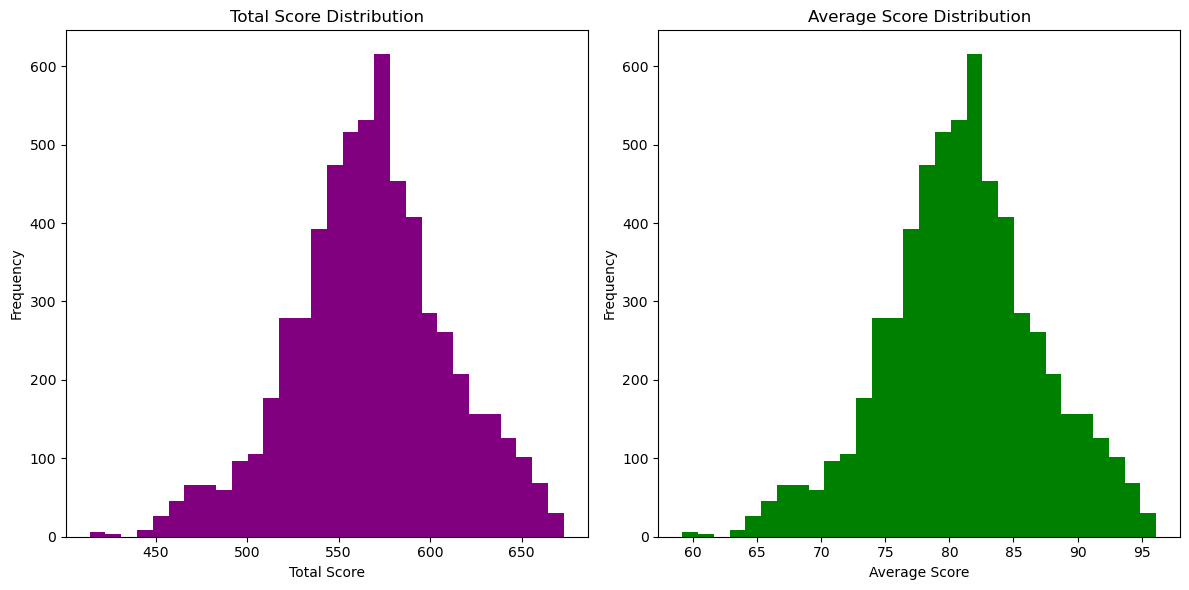

In [17]:
# Plotting total_score and average_score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(student_score['total_score'], bins=30, color='purple')
plt.title('Total Score Distribution')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(student_score['average_score'], bins=30, color='green')
plt.title('Average Score Distribution')
plt.xlabel('Average Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Encoding Categorical Columns and feature extraction

In [18]:
gender_map = {'male': 0, 'female': 1}
part_time_job_map = {False: 0, True: 1}
extracurricular_activities_map = {False: 0, True: 1}
career_aspiration_map = {
        'Lawyer': 0, 'Doctor': 1, 'Government Officer': 2, 'Artist': 3, 'Social Network Studies': 4,
        'Software Engineer': 5, 'Teacher': 6, 'Business Owner': 7, 'Scientist': 8,
        'Banker': 9, 'Writer': 10, 'Accountant': 11, 'Designer': 12,
        'Construction Engineer': 13, 'Game Developer': 14, 'Stock Investor': 15,
        'Real Estate Developer': 16
    }
# Apply mapping to the DataFrame
student_score['gender'] = student_score['gender'].map(gender_map)
student_score['part_time_job'] = student_score['part_time_job'].map(part_time_job_map)
student_score['extracurricular_activities'] = student_score['extracurricular_activities'].map(extracurricular_activities_map)
student_score['career_aspiration'] = student_score['career_aspiration'].map(career_aspiration_map)

In [19]:
student_score.head()

,gender,part_time_job,absence_days,extracurricular_activities,weekly_self_study_hours,career_aspiration,math_score,history_score,physics_score,chemistry_score,biology_score,english_score,geography_score,total_score,average_score
0,0,0,3,0,27,0,73,81,93,97,63,80,87,574,82.000000
1,1,0,2,0,47,1,90,86,96,100,90,88,90,640,91.428571
2,1,0,9,1,13,2,81,97,95,96,65,77,94,605,86.428571
3,1,0,5,0,3,3,71,74,88,80,89,63,86,551,78.714286
4,0,0,5,0,10,4,84,77,65,65,80,74,76,521,74.428571


# Balancing Dataset

In [20]:
student_score['career_aspiration'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

In [21]:
student_score['career_aspiration'].value_counts()

5     945
7     927
4     669
9     507
0     414
11    378
1     357
16    249
15    219
13    204
3     201
14    189
2     183
6     177
12    168
8     117
10     96
Name: career_aspiration, dtype: int64

In [11]:
# # !pip install -U scikit-learn
# # !pip install scikit-learn
# # !pip uninstall -U scikit-learn
# !pip install scikit-learn==1.2.0
# !pip install imbalanced-learn==0.9.0
!pip install -U scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/55/0403bf2031250ac982c8053397889fbc5a3a2b3798b913dae4f51c3af6a4/scikit_learn-1.5.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 279.3 kB/s eta 0:00:40
   ---------------------------------------- 0.0/11.0 MB 279.3 kB/s eta 0:00:40
   ---------------------------------------- 0.1/11.0 MB 174.3 kB/s eta 0:01:03
   ---------------------------------------- 0.1/11.0 MB 254.2 kB/s eta 0:00:43
   ---------------------------------------- 0.1/11.0 MB 254.2 kB/s eta 0:00:43
   ---------------------------------------- 0.1/11.0 MB 227.6 kB/s eta 0:00:48
   -------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HP\\anaconda\\Lib\\site-packages\\~=learn\\.libs\\msvcp140.dll'
Consider using the `--user` option or check the permissions.



In [12]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [29]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Separate features and target variable
X = student_score.drop('career_aspiration', axis=1)
y = student_score['career_aspiration']

# Apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X, y)

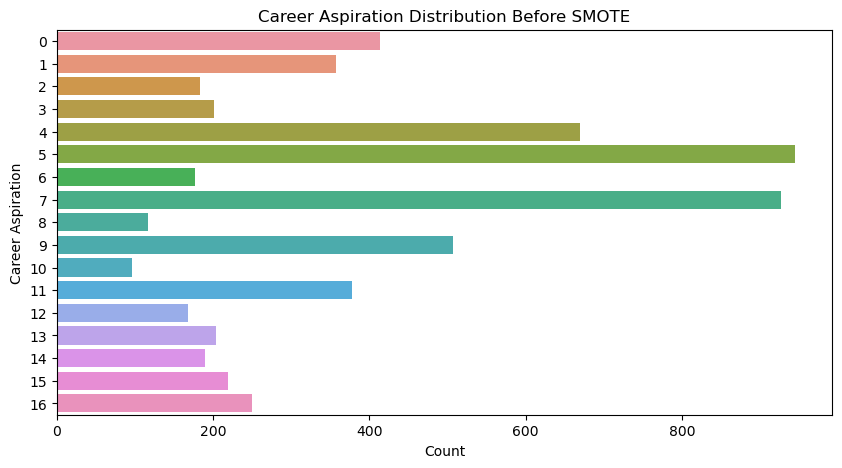

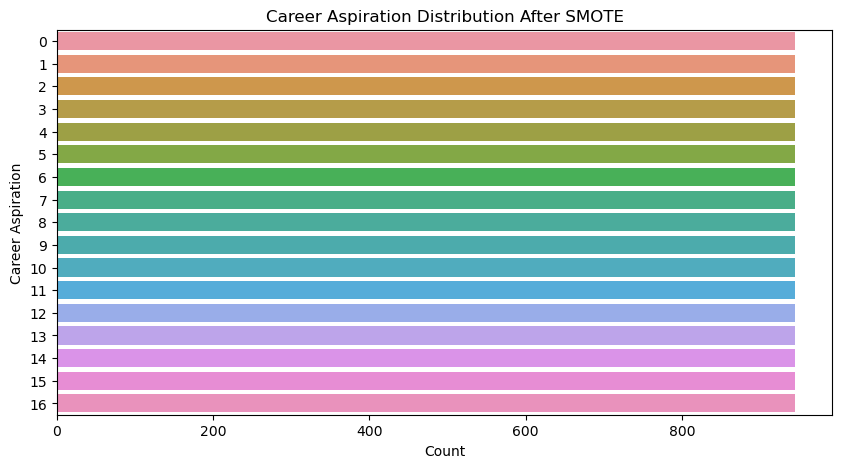

In [30]:
import seaborn as sns

# Class distribution before SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(y=student_score['career_aspiration'])
plt.title('Career Aspiration Distribution Before SMOTE')
plt.xlabel('Count')
plt.ylabel('Career Aspiration')
plt.show()

# Class distribution after SMOTE
plt.figure(figsize=(10, 5))
sns.countplot(y=y_resampled)
plt.title('Career Aspiration Distribution After SMOTE')
plt.xlabel('Count')
plt.ylabel('Career Aspiration')
plt.show()

# Train test Split For Preparing Train and Validation Data

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2, random_state=42)

In [32]:
X_train.shape

(12852, 14)

# Feature Scalling

In [33]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
X_train_scaled.shape

(12852, 14)

# Models Training (Multiple Models) for more models to our machine learning models

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Random Forest Classifier": RandomForestClassifier(),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "XGBoost Classifier": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

# Train and evaluate each model
for name, model in models.items():
    print("="*50)
    print("Model:", name)
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Print metrics
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_rep)
    print("Confusion Matrix:\n", conf_matrix)


Model: Logistic Regression
Accuracy: 0.44195455960161845
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.40      0.39       192
           1       0.45      0.61      0.52       178
           2       0.43      0.32      0.36       190
           3       0.56      0.57      0.56       212
           4       0.34      0.22      0.26       190
           5       0.34      0.28      0.31       210
           6       0.51      0.81      0.63       187
           7       0.85      0.84      0.85       177
           8       0.53      0.49      0.51       202
           9       0.28      0.10      0.15       189
          10       0.43      0.57      0.49       197
          11       0.40      0.38      0.39       173
          12       0.21      0.14      0.16       198
          13       0.32      0.56      0.41       165
          14       0.58      0.85      0.69       181
          15       0.21      0.12      0.16       184


Accuracy: 0.26112667289137875
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.33      0.42       192
           1       0.47      0.35      0.40       178
           2       0.32      0.06      0.11       190
           3       0.55      0.10      0.17       212
           4       0.45      0.07      0.13       190
           5       0.37      0.10      0.16       210
           6       0.20      1.00      0.34       187
           7       0.89      0.76      0.82       177
           8       0.58      0.19      0.28       202
           9       0.44      0.04      0.08       189
          10       0.51      0.12      0.20       197
          11       0.57      0.20      0.30       173
          12       0.25      0.02      0.03       198
          13       0.12      1.00      0.21       165
          14       0.80      0.02      0.04       181
          15       0.12      0.01      0.02       184
          16       0.38    

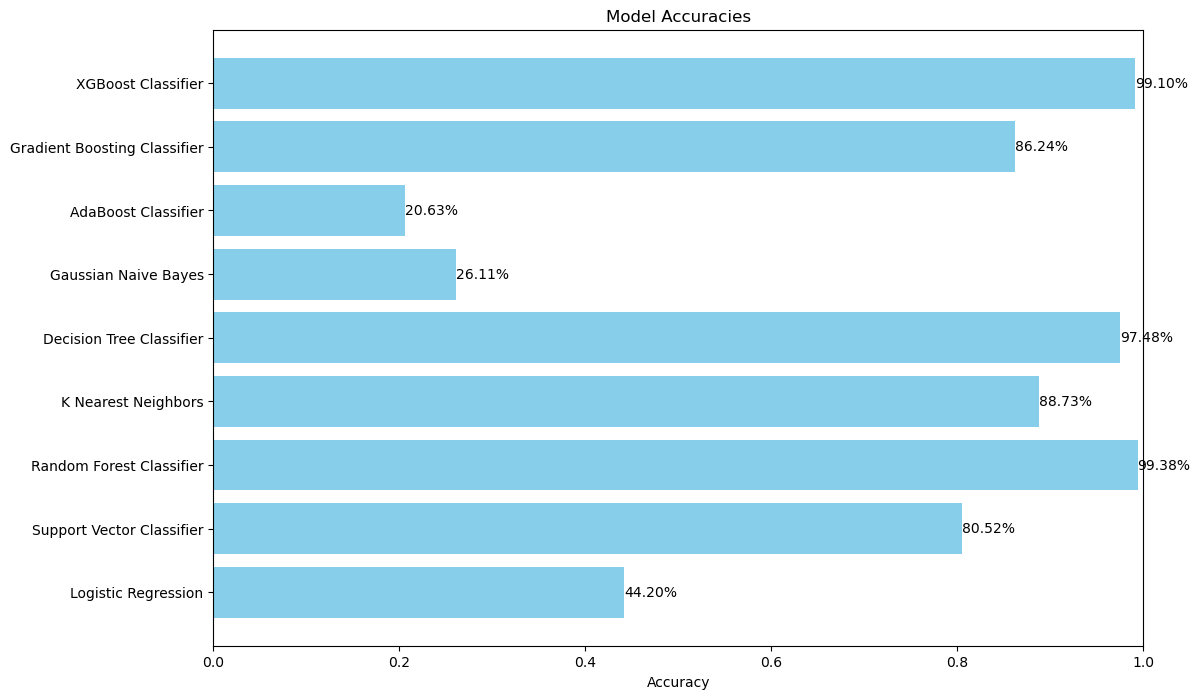

In [36]:
import matplotlib.pyplot as plt

# Accuracy scores for different models
models = [
    ("Logistic Regression", 0.44195455960161845),
    ("Support Vector Classifier", 0.8051665110488639),
    ("Random Forest Classifier", 0.9937752878929349),
    ("K Nearest Neighbors", 0.8873327108621226),
    ("Decision Tree Classifier", 0.9747899159663865),
    ("Gaussian Naive Bayes", 0.26112667289137875),
    ("AdaBoost Classifier", 0.20634920634920634),
    ("Gradient Boosting Classifier", 0.8624338624338624),
    ("XGBoost Classifier", 0.9909741674447556)
]

# Extract model names and accuracies
model_names, accuracies = zip(*models)

# Plotting the accuracies
plt.figure(figsize=(12, 8))
bars = plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracies')
plt.xlim(0, 1)

# Adding text labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width() * 100:.2f}%', va='center', ha='left')

plt.show()


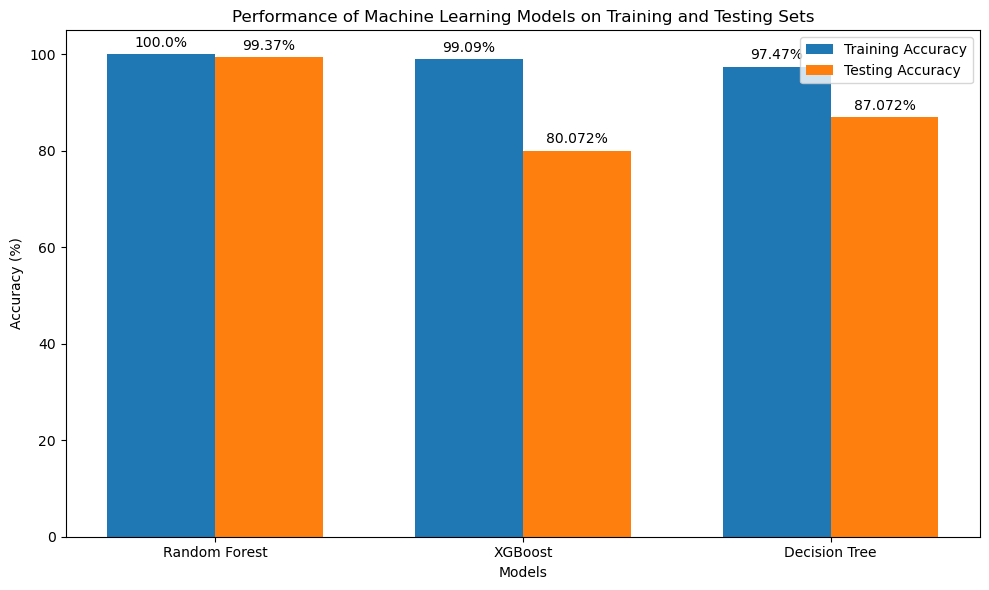

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Random Forest', 'XGBoost', 'Decision Tree']
training_accuracy = [100, 99.09, 97.47]
testing_accuracy = [99.37, 80.072, 87.072]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Testing Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title('Performance of Machine Learning Models on Training and Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Attach a text label above each bar in rects, displaying its height.
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height}%',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Display the plot
plt.show()


# Model Selection Of Trained Multiple Models And Selected (Random Forest)

In [39]:
model = RandomForestClassifier()

model.fit(X_train_scaled, y_train)
# Predict on test set
y_pred = model.predict(X_test_scaled)

# Calculate metrics
# Print metrics
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9937752878929349
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       192
           1       0.98      1.00      0.99       178
           2       0.98      1.00      0.99       190
           3       1.00      1.00      1.00       212
           4       0.99      0.97      0.98       190
           5       0.97      0.99      0.98       210
           6       0.97      1.00      0.99       187
           7       1.00      1.00      1.00       177
           8       0.98      1.00      0.99       202
           9       1.00      0.95      0.97       189
          10       1.00      0.99      1.00       197
          11       1.00      0.98      0.99       173
          12       1.00      0.97      0.98       198
          13       1.00      1.00      1.00       165
          14       1.00      1.00      1.00       181
          15       1.00      1.00      1.00       184
          16       0.98     

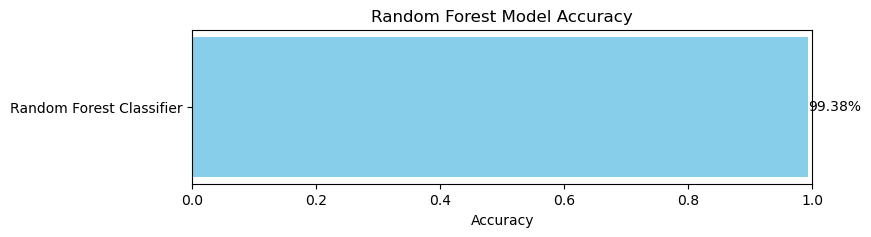

In [40]:
import matplotlib.pyplot as plt

# Accuracy for Random Forest model
random_forest_model = ("Random Forest Classifier", 0.9937752878929349)

# Extract model name and accuracy
model_name, accuracy = random_forest_model

# Plotting the accuracy
plt.figure(figsize=(8, 2))
bar = plt.barh([model_name], [accuracy], color='skyblue')
plt.xlabel('Accuracy')
plt.title('Random Forest Model Accuracy')
plt.xlim(0, 1)

# Adding text label
plt.text(accuracy, 0, f'{accuracy * 100:.2f}%', va='center', ha='left')

plt.show()

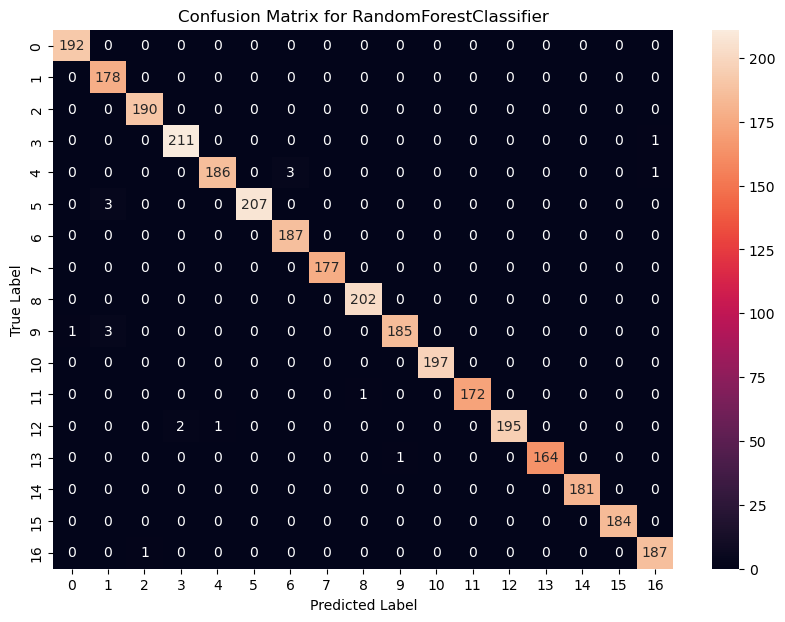

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming y_test and y_pred are defined as per your notebook
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data from your classification report
data = {
    'Class': list(range(17)),
    'Precision': [0.82, 0.74, 0.72, 0.87, 0.76, 0.55, 0.89, 0.95, 0.79, 0.70, 0.92, 0.86, 0.89, 0.78, 0.90, 0.91, 0.92],
    'Recall': [0.85, 0.97, 0.95, 0.93, 0.42, 0.38, 1.00, 0.92, 0.98, 0.69, 0.97, 0.72, 0.84, 0.91, 0.98, 0.78, 0.78],
    'F1-Score': [0.83, 0.84, 0.82, 0.90, 0.54, 0.45, 0.94, 0.93, 0.87, 0.69, 0.95, 0.78, 0.86, 0.84, 0.94, 0.84, 0.84],
    'Support': [68, 72, 57, 58, 66, 76, 71, 61, 53, 61, 63, 53, 68, 55, 57, 63, 69]
}

df = pd.DataFrame(data)

# Set 'Class' as the index
df.set_index('Class', inplace=True)


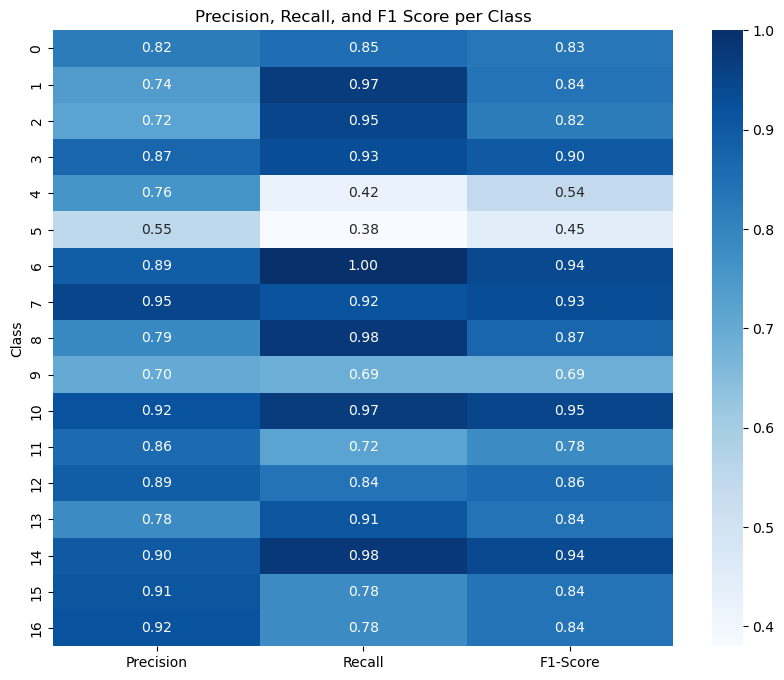

In [43]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Precision', 'Recall', 'F1-Score']], annot=True, cmap='Blues', fmt='.2f')
plt.title('Precision, Recall, and F1 Score per Class')
plt.show()

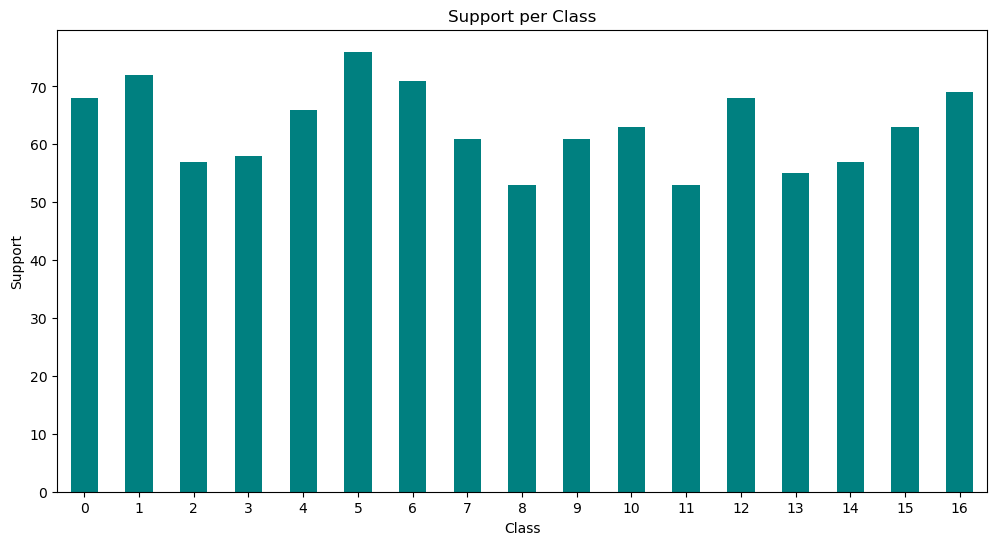

In [44]:
plt.figure(figsize=(12, 6))
df['Support'].plot(kind='bar', color='teal')
plt.title('Support per Class')
plt.xlabel('Class')
plt.ylabel('Support')
plt.xticks(rotation=0)
plt.show()

# Single Input Predictions of the model

In [45]:
# test 1
print("Actual Label :", y_test.iloc[10])
print("Model Prediction :",model.predict(X_test_scaled[10].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 16
Model Prediction : 16
Wow! Model doing well.....


In [46]:
# test 2
print("Actual Label :", y_test.iloc[300])
print("Model Prediction :",model.predict(X_test_scaled[300].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 6
Model Prediction : 6
Wow! Model doing well.....


In [47]:
# test 3
print("Actual Label :", y_test.iloc[23])
print("Model Prediction :",model.predict(X_test_scaled[23].reshape(1,-1))[0])
if y_test.iloc[10]==model.predict(X_test_scaled[10].reshape(1,-1)):
    print("Wow! Model doing well.....")
else:
    print("not sure......")

Actual Label : 4
Model Prediction : 4
Wow! Model doing well.....


# Saving & Load Files The Trained And Tested Model

In [48]:
import pickle
# SAVE FILES
pickle.dump(scaler,open("C:\\Users\\HP\\Education Recommendation\\Models\\scaler1.pkl",'wb'))
pickle.dump(model,open("C:\\Users\\HP\\Education Recommendation\\Models\\model1.pkl",'wb'))

In [49]:

# Load the scaler, label encoder, and model
scaler = pickle.load(open("C:\\Users\\HP\\Education Recommendation\\Models\\scaler1.pkl",'rb'))
model = pickle.load(open("C:\\Users\\HP\\Education Recommendation\\Models\\model1.pkl", 'rb'))

# Recommendation System

In [57]:
import pickle
import numpy as np

# Load the scaler, model, and class names
scaler = pickle.load(open("C:\\Users\\HP\\Education Recommendation\\Models\\scaler.pkl", 'rb'))
model = pickle.load(open("C:\\Users\\HP\\Education Recommendation\\Models\\model.pkl", 'rb'))
class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Social Network Studies',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

# Define the subject combination names
subject_combinations = {
    'history_geography': ['Historian', 'Geographer', 'Political Scientist', 'Teacher'],
    'physics_chemistry': ['Physicist', 'Chemist', 'Engineer', 'Scientist'],
    'biology_chemistry': ['Biologist', 'Chemist', 'Medical Researcher', 'Doctor'],
    'physics_math': ['Engineer', 'Physicist', 'Mathematician', 'Data Scientist'],
    'history_english': ['Writer', 'Historian', 'Teacher', 'Journalist']
}

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score, average_score):
    
    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0

    # Create the original feature array for scaling (14 features)
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score,
                               total_score, average_score]])
    
    # Scale features
    scaled_features = scaler.transform(feature_array)
    
    recommendations = {}

    # Predict for each subject combination
    for combination in subject_combinations.keys():
        # Calculate the average score for the current combination
        if combination == 'history_geography':
            subject_avg_score = (history_score + geography_score) / 2
        elif combination == 'physics_chemistry':
            subject_avg_score = (physics_score + chemistry_score) / 2
        elif combination == 'biology_chemistry':
            subject_avg_score = (biology_score + chemistry_score) / 2
        elif combination == 'physics_math':
            subject_avg_score = (physics_score + math_score) / 2
        elif combination == 'history_english':
            subject_avg_score = (history_score + english_score) / 2
        
        # Predict using the model
        probabilities = model.predict_proba(scaled_features)
        
        # Get top two predicted classes along with their probabilities
        top_classes_idx = np.argsort(-probabilities[0])[:2]
        top_classes_names_probs = [(class_names[idx], probabilities[0][idx]) for idx in top_classes_idx]
        
        # Map the predictions to the relevant education and job fields for each subject combination
        recommendations[combination] = {
            'Subjects': subject_combinations[combination],
            'Recommendations': top_classes_names_probs
        }
    
    return recommendations


In [60]:
# Example usage
recommendations = Recommendations(
    gender='female', 
    part_time_job=True, 
    absence_days=5, 
    extracurricular_activities=True, 
    weekly_self_study_hours=10, 
    math_score=85, 
    history_score=90, 
    physics_score=80, 
    chemistry_score=85, 
    biology_score=88, 
    english_score=92, 
    geography_score=87, 
    total_score=650, 
    average_score=85
)
for combination, result in recommendations.items():
    print(f"Subject Combination: {combination}")
    print("Relevant Fields:", ", ".join(result['Subjects']))
    print("Top Recommendations:")
    for job, prob in result['Recommendations']:
        print(f" - {job}: {prob:.2f}")
    print()

Subject Combination: history_geography
Relevant Fields: Historian, Geographer, Political Scientist, Teacher
Top Recommendations:
 - Teacher: 0.09
 - Stock Investor: 0.08

Subject Combination: physics_chemistry
Relevant Fields: Physicist, Chemist, Engineer, Scientist
Top Recommendations:
 - Teacher: 0.09
 - Stock Investor: 0.08

Subject Combination: biology_chemistry
Relevant Fields: Biologist, Chemist, Medical Researcher, Doctor
Top Recommendations:
 - Teacher: 0.09
 - Stock Investor: 0.08

Subject Combination: physics_math
Relevant Fields: Engineer, Physicist, Mathematician, Data Scientist
Top Recommendations:
 - Teacher: 0.09
 - Stock Investor: 0.08

Subject Combination: history_english
Relevant Fields: Writer, Historian, Teacher, Journalist
Top Recommendations:
 - Teacher: 0.09
 - Stock Investor: 0.08



In [62]:
# Example usage
recommendations = Recommendations(
    gender='male', 
    part_time_job=True, 
    absence_days=2, 
    extracurricular_activities=True, 
    weekly_self_study_hours=50, 
    math_score=100, 
    history_score=90, 
    physics_score=100, 
    chemistry_score=80, 
    biology_score=80, 
    english_score=92, 
    geography_score=87, 
    total_score=650, 
    average_score=85
)

for combination, result in recommendations.items():
    print(f"Subject Combination: {combination}")
    print("Relevant Fields:", ", ".join(result['Subjects']))
    print("Top Recommendations:")
    for job, prob in result['Recommendations']:
        print(f" - {job}: {prob:.2f}")
    print()

Subject Combination: history_geography
Relevant Fields: Historian, Geographer, Political Scientist, Teacher
Top Recommendations:
 - Game Developer: 0.12
 - Social Network Studies: 0.09

Subject Combination: physics_chemistry
Relevant Fields: Physicist, Chemist, Engineer, Scientist
Top Recommendations:
 - Game Developer: 0.12
 - Social Network Studies: 0.09

Subject Combination: biology_chemistry
Relevant Fields: Biologist, Chemist, Medical Researcher, Doctor
Top Recommendations:
 - Game Developer: 0.12
 - Social Network Studies: 0.09

Subject Combination: physics_math
Relevant Fields: Engineer, Physicist, Mathematician, Data Scientist
Top Recommendations:
 - Game Developer: 0.12
 - Social Network Studies: 0.09

Subject Combination: history_english
Relevant Fields: Writer, Historian, Teacher, Journalist
Top Recommendations:
 - Game Developer: 0.12
 - Social Network Studies: 0.09



# THE VISUALIZATION OF THE ABOVE Recommendation System

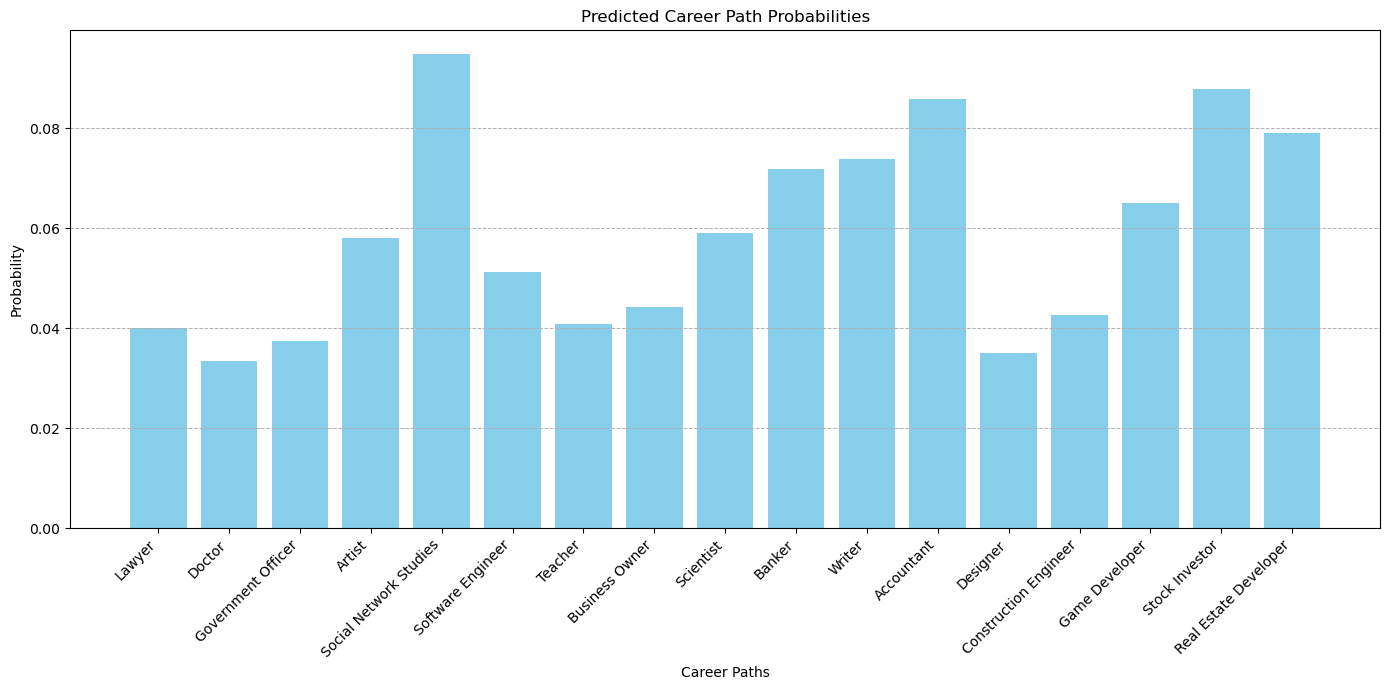

In [53]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# Load the scaler and model
scaler = pickle.load(open("C:\\Users\\HP\\Education Recommendation\\Models\\scaler.pkl",'rb'))
model = pickle.load(open("C:\\Users\\HP\\Education Recommendation\\Models\\model.pkl", 'rb'))
class_names = ['Lawyer', 'Doctor', 'Government Officer', 'Artist', 'Social Network Studies',
               'Software Engineer', 'Teacher', 'Business Owner', 'Scientist',
               'Banker', 'Writer', 'Accountant', 'Designer',
               'Construction Engineer', 'Game Developer', 'Stock Investor',
               'Real Estate Developer']

def Recommendations(gender, part_time_job, absence_days, extracurricular_activities,
                    weekly_self_study_hours, math_score, history_score, physics_score,
                    chemistry_score, biology_score, english_score, geography_score,
                    total_score, average_score):
    # Encode categorical variables
    gender_encoded = 1 if gender.lower() == 'female' else 0
    part_time_job_encoded = 1 if part_time_job else 0
    extracurricular_activities_encoded = 1 if extracurricular_activities else 0

    # Create feature array
    feature_array = np.array([[gender_encoded, part_time_job_encoded, absence_days, extracurricular_activities_encoded,
                               weekly_self_study_hours, math_score, history_score, physics_score,
                               chemistry_score, biology_score, english_score, geography_score,
                               total_score, average_score]])

    # Scale features
    scaled_features = scaler.transform(feature_array)
    
    # Get probabilities for each class
    probabilities = model.predict_proba(scaled_features)[0]

    # Return a dictionary mapping class names to probabilities
    return dict(zip(class_names, probabilities))

# Sample data for demonstration
recommendations = Recommendations(
    gender='female', 
    part_time_job=False, 
    absence_days=3, 
    extracurricular_activities=True, 
    weekly_self_study_hours=25, 
    math_score=85, 
    history_score=78, 
    physics_score=92, 
    chemistry_score=88, 
    biology_score=81, 
    english_score=90, 
    geography_score=75, 
    total_score=580, 
    average_score=82.857
)

# Visualization
plt.figure(figsize=(14, 7))
plt.bar(recommendations.keys(), recommendations.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Career Paths')
plt.ylabel('Probability')
plt.title('Predicted Career Path Probabilities')
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


In [54]:
# sklear version in pychar production 
import sklearn
print(sklearn.__version__)
# in pycharm env install
# pip install scikit-learn==1.3.2

1.5.1


# REPORT OF THIS MACHINE LEARNING PROJECT AS SOMALIA

Here’s a concise summary report translated into the Somali language, based on the details from your Jupyter Notebook on the Education Studies Career Recommendation System using machine learning:

Warbixinta Mashruuca Nidaamka Talo-bixinta Xirfadda Waxbarashada:
Hordhac:
Mashruucan waxaa diiradda lagu saaray abuurista nidaam talo-bixin xirfadeed oo shakhsiyeed si looga caawiyo ardayda inay go’aansadaan takhasusyadooda waxbarasho iyadoo la adeegsanayo teknoolojiyada barashada mashiinka. Waxa aanu isticmaalnay xog arday oo faahfaahsan si aanu u tababarno moodallo kala duwan oo saadaalinaya xirfadaha ugu habboon arday kasta.

Diyaarinta Xogta:
Xogta waxaa laga soo xulay ilo kala duwan oo ay ku jiraan darajooyinka imtixaanaadka, dhaqdhaqaaqyada manhajiga ka baxsan, iyo saacadaha daraasadda shakhsiga ah. Waxa aanu nadiifinnay xogta annaga oo tirtirayna tiirar aan muhiim ahayn oo aanu abuurnay astaamo cusub sida 'Dhibcaha Guud' iyo 'Celceliska Dhibcaha' si aan u fahamno waxqabadka ardayga si ka wanaagsan.

Isu dheellitirka Xogta:
Waxaan isticmaalnay habka SMOTE si aan u dheelitirno xogta, taas oo ka caawisay in moodooyinka ay si siman uga baran karaan dhammaan qaybaha xirfadeed ee suurtagalka ah.

Tababbarka iyo Qiimaynta Modelka:
Waxaan tababarnay dhowr moodal, oo ay ku jiraan Logistic Regression, Random Forest, iyo XGBoost. Waxaan ku qiimeynay waxqabadka iyaga oo adeegsanaya metrikiska sida saxnaanta, warbixinta fasalka, iyo matrix isku dhaca. Moodalka Random Forest ayaa muujiyay waxqabadka ugu wanaagsan waxaana loo doortay inuu noqdo moodalka ugu weyn ee talo bixinta.

Natiijada iyo Isticmaalka:
Nidaamka talo-bixinta waxaa loogu talagalay inuu si shakhsiyeed ugu talinayo xirfadaha ardayda iyadoo ku saleysan astaamahooda iyo danahooda waxbarasho. Tani waxay ka caawisaa hagaajinta ku qanacsanaanta ardayda iyada oo yaraynaysa khilaafaadka u dhexeeya filashooyinka iyo natiijooyinka waxbarasho.

Kaydinta iyo Codsiga Nidaamka:
Moodalka la tababaray iyo waxyaabaha lagama maarmaanka u ah waxay ku kaydsan yihiin faylal, taas oo suurtogelinaysa in dib loo isticmaalo si fudud mustaqbalka. Waxaan sidoo kale bixinay tusaaleyaal ku saabsan sida loo isticmaali karo nidaamka talo-bixinta si loo bixiyo talooyin xirfadeed oo ku saleysan gelitaanka xogta cusub ee ardayda.

Warbixintan kooban waxay si cad u sharxaysaa geedi socodka iyo natiijooyinka mashruuca Nidaamka Talo-bixinta Xirfadeed ee Waxbarashada iyadoo adeegsanaysa barashada mashiinka, waxayna siinaysaa aragti ku saabsan sida teknoolojiyada AI loogu dabaqi karo goobaha waxbarashada si loo hagaajiyo go'aan qaadashada ardayda iyo qanacsanaantooda.

# REPORT OF THIS MACHINE LEARNING PROJECT AS ENGLISH

The goal of this project was to employ machine learning technology to create a personalized career suggestion system that would help students choose their areas of study. We trained many models that predict the best career trajectories for individual students using a large dataset of student grades, extracurricular activities, and study hours.

Data Preparation: Exam results, extracurricular activities, and solitary study hours were among the many sources from which information was collected. We eliminated unnecessary columns from the data to clean it up and include new features like "Total Score" and "Average Score" to help us better understand each student's performance.

Data Balance: To make sure the models could benefit equally from all possible profession categories, we balanced the data using the SMOTE approach.

Training and Evaluating Models:
Several models, including Logistic Regression, Random Forest, and XGBoost, were trained. Their performance was assessed using metrics such as accuracy, class reports, and confusion matrices. The Random Forest model demonstrated the best performance and was chosen as the primary model for making recommendations.

Results and Application:
The recommendation system is designed to provide personalized career advice to students based on their characteristics and academic interests. This helps improve student satisfaction by reducing mismatches between expectations and educational outcomes.

Saving and Deploying the System: To make it easier to reuse in future applications, the trained model and all required components were stored in files. Additionally, we gave instances of how the recommendation engine may be used to offer career guidance based on fresh student data inputs.